In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data as pdr
import datetime 
import yfinance as yf
import plotly.io as pio
pio.renderers.default = "notebook_connected"
yf.pdr_override()

In [2]:
startdate = datetime.date(2021,1,1)
enddate = datetime.date.today()

**Sector Analysis**

**Automotive and Electric Vehicles**
1. Ford Motor Company (F)
2. Tesla, Inc. (TSLA)
3. Nikola Corporation (NKLA)
4. Volvo (VOLV-B.ST)

In [3]:
EV_data = pdr.get_data_yahoo(['F', 'TSLA','NKLA','VOLV-B.ST']  , start=startdate, end=enddate)

[*********************100%%**********************]  4 of 4 completed


In [4]:
EV_data.head()

Price      Adj Close                                    Close              
Ticker             F       NKLA        TSLA   VOLV-B.ST     F       NKLA   
Date                                                                       
2021-01-04  7.234354  16.080000  243.256668  163.034943  8.52  16.080000  \
2021-01-05  7.344736  16.030001  245.036667  165.510178  8.65  16.030001   
2021-01-06  7.506065  16.200001  251.993332         NaN  8.84  16.200001   
2021-01-07  7.692869  17.820000  272.013336  173.843430  9.06  17.820000   
2021-01-08  7.641923  17.750000  293.339996  174.173462  9.00  17.750000   

Price                               High             ...         Low   
Ticker            TSLA   VOLV-B.ST     F       NKLA  ...        TSLA   
Date                                                 ...               
2021-01-04  243.256668  197.600006  8.84  16.170000  ...  239.063339  \
2021-01-05  245.036667  200.600006  8.72  16.250000  ...  239.733337   
2021-01-06  251.993332         NaN  8.94  16.900000  ...  249.699997   
2021-01-07  272.013336  210.699997  9.08  17.879999  ...  258.399994   
2021-01-08  293.339996  211.100006  9.14  18.840000  ...  279.463318   

Price                   Open                                         Volume   
Ticker       VOLV-B.ST     F       NKLA        TSLA   VOLV-B.ST           F   
Date                                                                          
2021-01-04  194.600006  8.81  15.500000  239.820007  194.949997  85043100.0  \
2021-01-05  196.500000  8.47  15.860000  241.220001  196.750000  70127800.0   
2021-01-06         NaN  8.79  16.200001  252.830002         NaN  72590200.0   
2021-01-07  204.100006  8.94  16.895000  259.209991  205.000000  77117100.0   
2021-01-08  210.199997  9.10  18.799999  285.333344  212.800003  59162200.0   

Price                                           
Ticker            NKLA         TSLA  VOLV-B.ST  
Date                                            
2021-01-04  11313400.0  145914600.0  3238421.0  
2021-01-05   7925900.0   96735600.0  2562518.0  
2021-01-06  11702600.0  134100000.0        NaN  
2021-01-07  19816400.0  154496700.0  8105176.0  
2021-01-08  17800300.0  225166500.0  4884731.0  

[5 rows x 24 columns]

In [5]:
EV_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 852 entries, 2021-01-04 to 2024-04-19
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, F)          829 non-null    float64
 1   (Adj Close, NKLA)       829 non-null    float64
 2   (Adj Close, TSLA)       829 non-null    float64
 3   (Adj Close, VOLV-B.ST)  834 non-null    float64
 4   (Close, F)              829 non-null    float64
 5   (Close, NKLA)           829 non-null    float64
 6   (Close, TSLA)           829 non-null    float64
 7   (Close, VOLV-B.ST)      834 non-null    float64
 8   (High, F)               829 non-null    float64
 9   (High, NKLA)            829 non-null    float64
 10  (High, TSLA)            829 non-null    float64
 11  (High, VOLV-B.ST)       834 non-null    float64
 12  (Low, F)                829 non-null    float64
 13  (Low, NKLA)             829 non-null    float64
 14  (Low, TSLA)            

In [7]:
#Identifying nulls in the data
EV_data.isnull().values.any()

True

In [9]:
#count of null values
null_counts = EV_data.isnull().sum()
print(null_counts)

Price      Ticker   
Adj Close  F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
Close      F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
High       F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
Low        F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
Open       F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
Volume     F            23
           NKLA         23
           TSLA         23
           VOLV-B.ST    18
dtype: int64


In [12]:
#Percentage of Null Values in Each Column
null_percentage = (EV_data.isnull().sum() / len(EV_data)) * 100
print(null_percentage)

Price      Ticker   
Adj Close  F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
Close      F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
High       F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
Low        F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
Open       F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
Volume     F            2.699531
           NKLA         2.699531
           TSLA         2.699531
           VOLV-B.ST    2.112676
dtype: float64


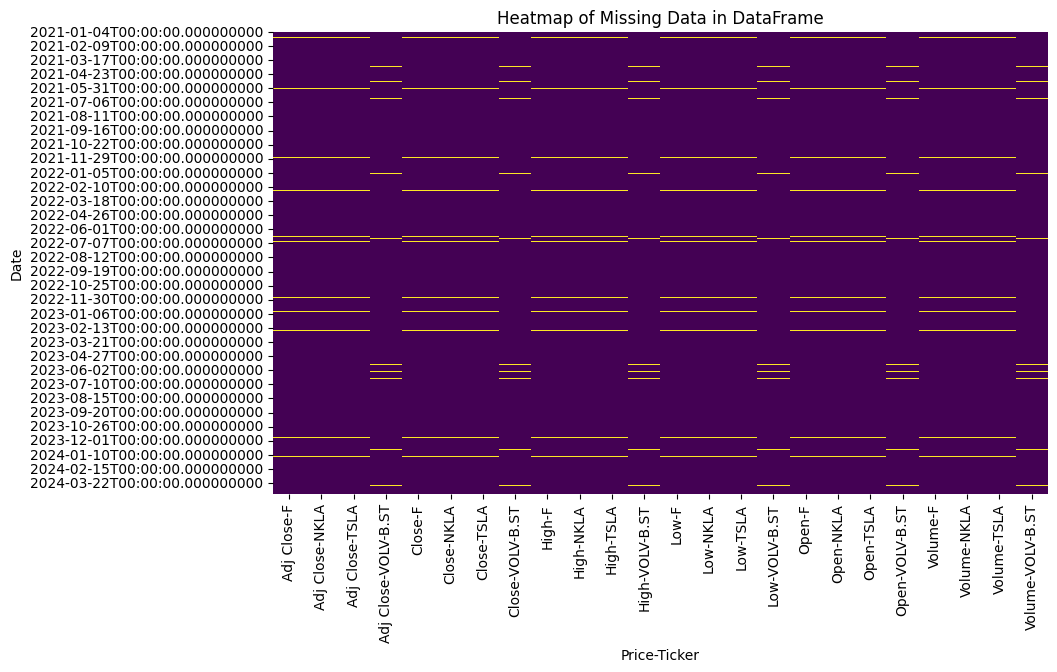

In [15]:
#Visualization of null values
# Creating a heatmap of where the null values are
plt.figure(figsize=(10, 6))
sns.heatmap(EV_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data in DataFrame')
plt.show()

In [16]:
# Calculating the mean for each column in your actual data
column_means = EV_data.mean()
# Filling missing values with the column means
EV_data.fillna(column_means, inplace=True)


In [17]:
EV_data.describe()

Price    Adj Close                                           Close   
Ticker           F        NKLA        TSLA   VOLV-B.ST           F   
count   852.000000  852.000000  852.000000  852.000000  852.000000  \
mean     12.193119    6.514960  241.649095  193.419135   13.665802   
std       2.105528    5.743701   55.167246   32.508347    2.652313   
min       7.234354    0.542000  108.099998  142.694763    8.520000   
25%      10.917335    1.380000  202.516666  175.018383   12.000000   
50%      11.802809    5.410000  238.654999  186.215744   12.900000   
75%      12.994047   10.290000  272.090843  208.081142   14.630000   
max      21.496590   28.580000  409.970001  307.498352   25.190001   

Price                                             High              ...   
Ticker        NKLA        TSLA   VOLV-B.ST           F        NKLA  ...   
count   852.000000  852.000000  852.000000  852.000000  852.000000  ...  \
mean      6.514960  241.649095  209.015168   13.884982    6.795236  ...   
std       5.743701   55.167246   30.557727    2.726087    5.985170  ...   
min       0.542000  108.099998  152.520004    8.720000    0.570000  ...   
25%       1.380000  202.516666  191.875004   12.150000    1.440000  ...   
50%       5.410000  238.654999  208.600006   13.075000    5.630000  ...   
75%      10.290000  272.090843  221.249996   14.842500   10.705000  ...   
max      28.580000  409.970001  318.000000   25.870001   30.400000  ...   

Price          Low                    Open                           
Ticker        TSLA   VOLV-B.ST           F        NKLA        TSLA   
count   852.000000  852.000000  852.000000  852.000000  852.000000  \
mean    236.144451  206.965552   13.664644    6.546615  241.862043   
std      53.800007   30.499678    2.654840    5.757224   55.348329   
min     101.809998  148.240005    8.470000    0.557000  103.000000   
25%     198.447498  190.500000   11.980000    1.360000  202.572498   
50%     233.985001  206.775002   12.880000    5.445000  238.663338   
75%     266.755005  219.300003   14.582500   10.294000  273.160835   
max     405.666656  317.049988   24.870001   27.250000  411.470001   

Price                     Volume                                            
Ticker   VOLV-B.ST             F          NKLA          TSLA     VOLV-B.ST  
count   852.000000  8.520000e+02  8.520000e+02  8.520000e+02  8.520000e+02  
mean    209.015995  6.835252e+07  3.440765e+07  1.020275e+08  3.723331e+06  
std      30.394659  3.334786e+07  4.584901e+07  4.005729e+07  1.705652e+06  
min     153.000000  1.298090e+07  2.976200e+06  2.940180e+07  6.261830e+05  
25%     192.180004  4.868285e+07  9.986950e+06  7.291898e+07  2.604758e+06  
50%     209.000000  6.041750e+07  1.506250e+07  9.721725e+07  3.347798e+06  
75%     221.274998  7.727818e+07  3.885785e+07  1.211460e+08  4.373225e+06  
max     318.299988  3.116452e+08  3.856128e+08  3.065906e+08  1.461196e+07  

[8 rows x 24 columns]

In [30]:
EV_data.to_csv('data.csv')

**Data Cleaning**

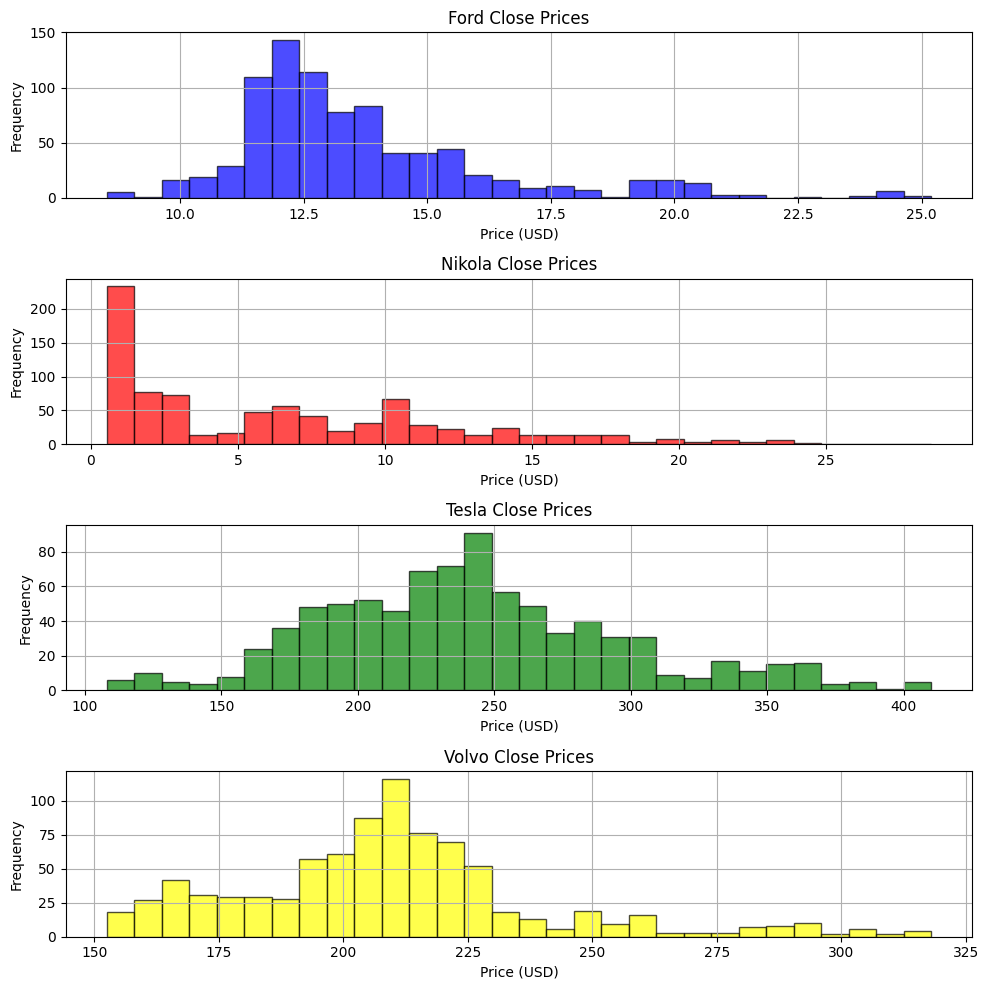

In [18]:
bins = 30  
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=False)

# Plot histograms for each stock
axs[0].hist(EV_data['Close', 'F'].dropna(), bins=bins, color='blue', edgecolor='black', alpha=0.7)
axs[0].set_title('Ford Close Prices')

axs[1].hist(EV_data['Close', 'NKLA'].dropna(), bins=bins, color='Red', edgecolor='black', alpha=0.7)
axs[1].set_title('Nikola Close Prices')

axs[2].hist(EV_data['Close', 'TSLA'].dropna(), bins=bins, color='Green', edgecolor='black', alpha=0.7)
axs[2].set_title('Tesla Close Prices')

axs[3].hist(EV_data['Close', 'VOLV-B.ST'].dropna(), bins=bins, color='Yellow', edgecolor='black', alpha=0.7)
axs[3].set_title('Volvo Close Prices')

# Set labels and layout
for ax in axs:
    ax.set_xlabel('Price (USD)')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


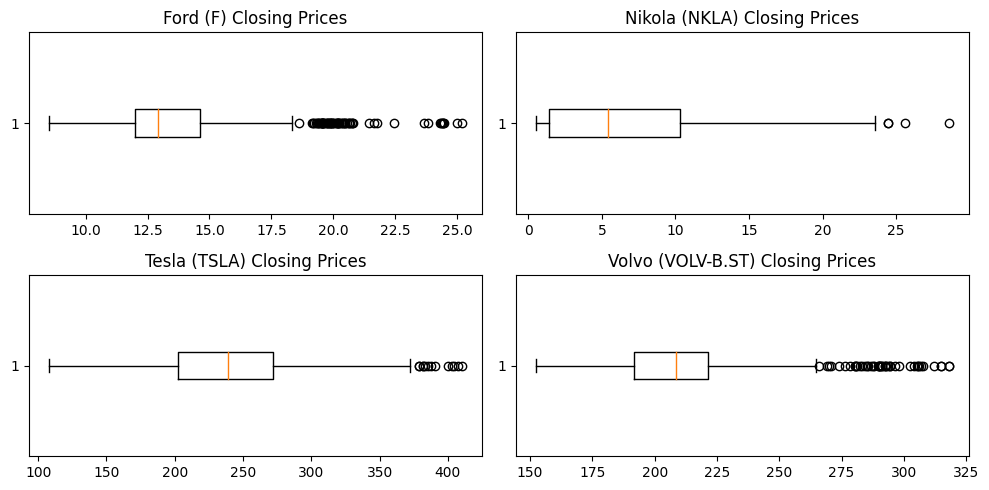

In [19]:
ig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5), sharex=False)

axs[0][0].boxplot(EV_data['Close', 'F'].dropna(), vert=False)
axs[0][0].set_title('Ford (F) Closing Prices')
axs[0][1].boxplot(EV_data['Close', 'NKLA'].dropna(), vert=False)
axs[0][1].set_title('Nikola (NKLA) Closing Prices')
axs[1][0].boxplot(EV_data['Close', 'TSLA'].dropna(), vert=False)
axs[1][0].set_title('Tesla (TSLA) Closing Prices')
axs[1][1].boxplot(EV_data['Close', 'VOLV-B.ST'].dropna(), vert=False)
axs[1][1].set_title('Volvo (VOLV-B.ST) Closing Prices')
plt.tight_layout()
plt.show()

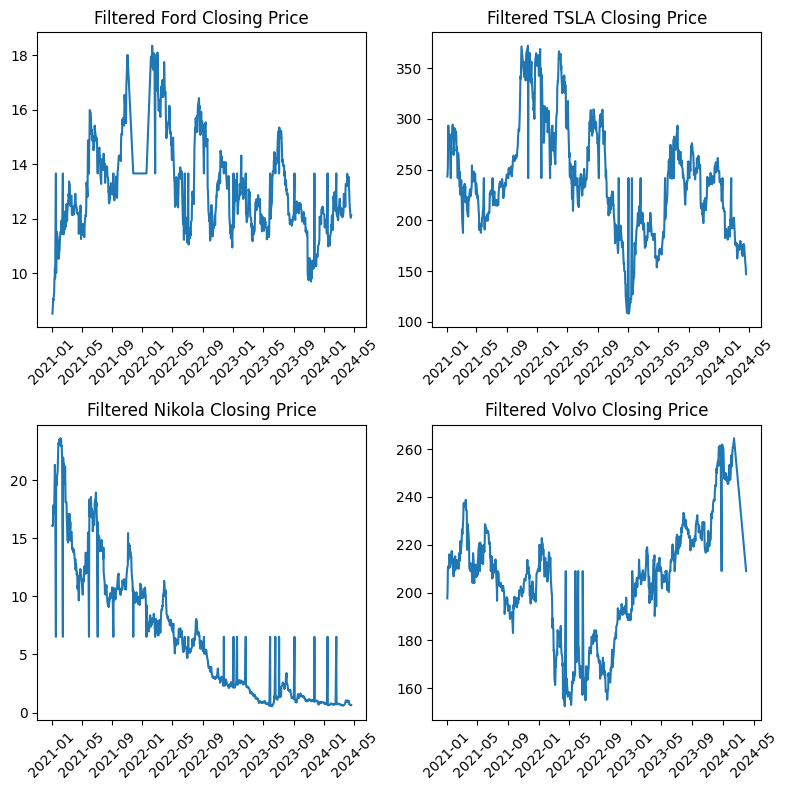

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=False)

# Ford
q1_f = EV_data['Close', 'F'].quantile(0.25)
q3_f = EV_data['Close', 'F'].quantile(0.75)
iqr_f = q3_f - q1_f
filter_f = (EV_data['Close', 'F'] >= q1_f - 1.5 * iqr_f) & (EV_data['Close', 'F'] <= q3_f + 1.5 * iqr_f)
filtered_data_f = EV_data.loc[filter_f, ('Close', 'F')]
axs[0][0].plot(filtered_data_f)
axs[0][0].set_title('Filtered Ford Closing Price')

# Tesla
q1_tesla = EV_data['Close', 'TSLA'].quantile(0.25)
q3_tesla = EV_data['Close', 'TSLA'].quantile(0.75)
iqr_tesla = q3_tesla - q1_tesla
filter_tsla = (EV_data['Close', 'TSLA'] >= q1_tesla - 1.5 * iqr_tesla) & (EV_data['Close', 'TSLA'] <= q3_tesla + 1.5 * iqr_tesla)
filtered_data_tsla = EV_data.loc[filter_tsla, ('Close', 'TSLA')]
axs[0][1].plot(filtered_data_tsla)
axs[0][1].set_title('Filtered TSLA Closing Price')

# Nikola
q1_nikola = EV_data['Close', 'NKLA'].quantile(0.25)
q3_nikola = EV_data['Close', 'NKLA'].quantile(0.75)
iqr_nikola = q3_nikola - q1_nikola
filter_nikola = (EV_data['Close', 'NKLA'] >= q1_nikola - 1.5 * iqr_nikola) & (EV_data['Close', 'NKLA'] <= q3_nikola + 1.5 * iqr_nikola)
filtered_data_nikola = EV_data.loc[filter_nikola, ('Close', 'NKLA')]
axs[1][0].plot(filtered_data_nikola)
axs[1][0].set_title('Filtered Nikola Closing Price')

# Volvo
q1_volvo = EV_data['Close', 'VOLV-B.ST'].quantile(0.25)
q3_volvo = EV_data['Close', 'VOLV-B.ST'].quantile(0.75)
iqr_volvo = q3_volvo - q1_volvo
filter_volvo = (EV_data['Close', 'VOLV-B.ST'] >= q1_volvo - 1.5 * iqr_volvo) & (EV_data['Close', 'VOLV-B.ST'] <= q3_volvo + 1.5 * iqr_volvo)
filtered_data_volvo = EV_data.loc[filter_volvo, ('Close', 'VOLV-B.ST')]
axs[1][1].plot(filtered_data_volvo)
axs[1][1].set_title('Filtered Volvo Closing Price')

# Rotate the x-axis labels for each subplot
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


The above plot shows the data after removing the outliers but, as stock market data can exhibit what might seem like outlier behavior due to its inherent volatility and responsiveness to market events like earnings announcements, changes in leadership, mergers and acquisitions, or broader economic news ...
So I am using the actual data without removing the outliers for my further analysis

**Calculating stock return : Return = (close-open)/open**

In [21]:
EV_data['Return', 'F'] = (EV_data['Close', 'F']  - EV_data['Open', 'F'])/EV_data['Open', 'F']
EV_data['Return', 'TSLA'] = (EV_data['Close', 'TSLA']  - EV_data['Open', 'TSLA'])/EV_data['Open', 'TSLA']
EV_data['Return', 'NKLA'] = (EV_data['Close', 'NKLA']  - EV_data['Open', 'NKLA'])/EV_data['Open', 'NKLA']
EV_data['Return', 'VOLV-B.ST'] = (EV_data['Close', 'VOLV-B.ST']  - EV_data['Open', 'VOLV-B.ST'])/EV_data['Open', 'VOLV-B.ST']

<Figure size 1500x600 with 0 Axes>

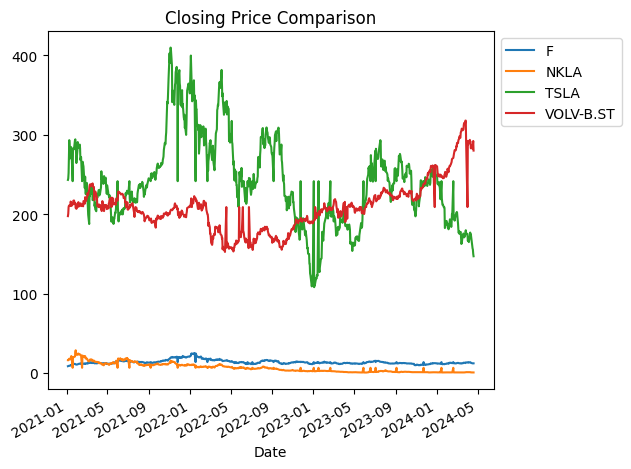

In [22]:
plt.figure(figsize=(15, 6))
EV_data['Close'].plot(title='Closing Prices')
plt.title('Closing Price Comparison')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

From the above graph we can see that ford stock market price is almost maintaing at the same level except for a short period between 2021 end - 2022 start there is huge increse in the stock price of the ford which is quite interesting to divein to learn the reasons for stock price increase.

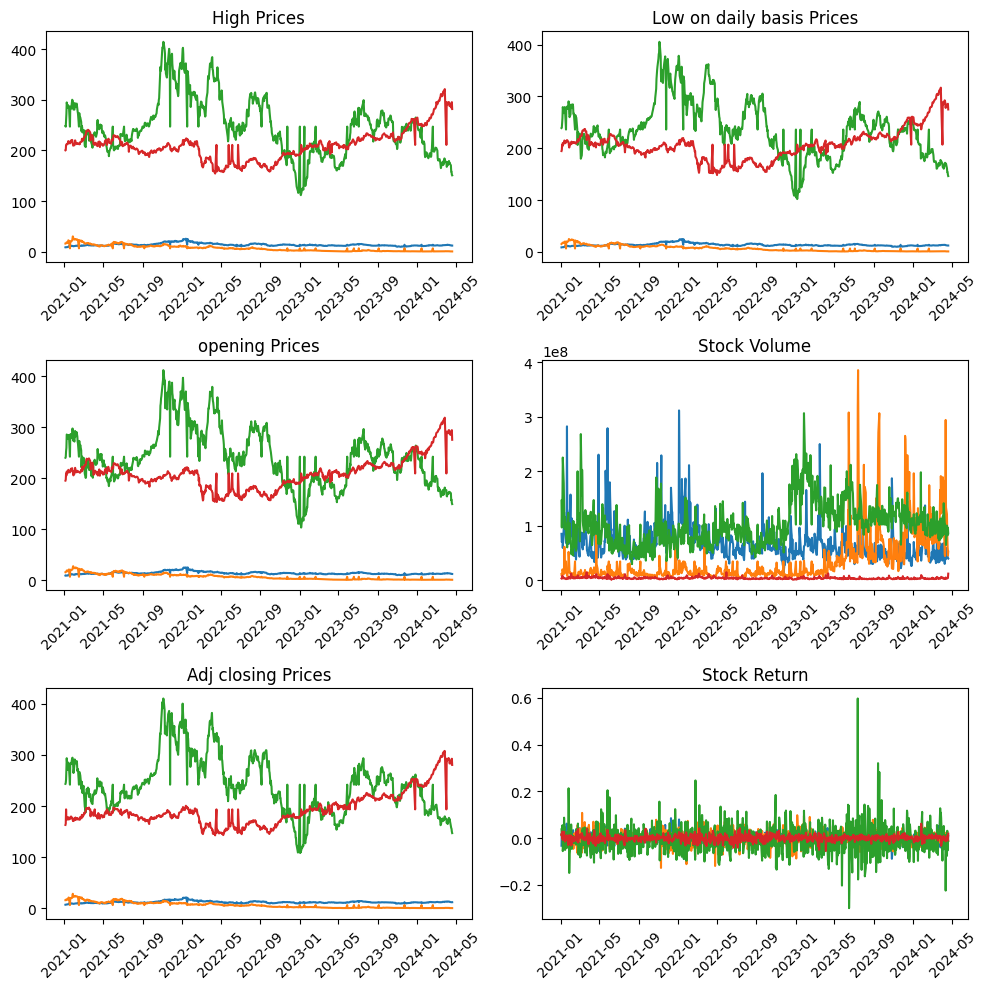

In [23]:
# Plotting all the metrics related to the strock data of ford
ig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10), sharex=False)
axs[0][0].plot(EV_data['High'])
axs[0][0].set_title('High Prices')
axs[0][1].plot(EV_data['Low'])
axs[0][1].set_title('Low on daily basis Prices')
axs[1][0].plot(EV_data['Open'])
axs[1][0].set_title('opening Prices')
axs[1][1].plot(EV_data['Volume'])
axs[1][1].set_title('Stock Volume')
axs[2][0].plot(EV_data['Adj Close'])
axs[2][0].set_title('Adj closing Prices')
axs[2][1].plot(EV_data['Return'])
axs[2][1].set_title('Stock Return')
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


### Analysis on the returns of the stock
The return provides a clear depiction of a stock's growth over time. It reflects the potential profit (or loss) one might realize if they were to purchase the stock at the opening of the trading day and sell it at the close. The return plot offers a visual representation of these fluctuations, highlighting days that yield a profit and those that result in a loss, thereby illustrating the stock's daily performance and investment volatility.

### Insights from Stock Returns Histograms

- **Volatility Analysis**: The spread of the histograms indicates the volatility of each stock. A wider spread suggests higher volatility. 
- **Return Frequency**: The height of the histogram bars represents the frequency of returns within a particular range. 
- **Skewness and Risk**: The skewness of the histograms (left or right) provides insight into the risk profile of the stock. 
- **Comparative Return Tendencies**: Positioning relative to the zero line indicates whether a stock typically has positive or negative returns. 
- **Diversification Strategy**: By comparing the return distributions, investors can strategize on diversifying their portfolio. Combining stocks with varying levels of volatility can help in achieving a balanced investment approach.

These histograms serve as a visual tool for assessing historical performance and can be a part of the decision-making process for potential future investments. It's crucial to complement these observations with a thorough fundamental analysis, as historical trends do not guarantee future outcomes.

**But usually we will analyze a short period of returns like 3 months or 6 months to analyze how the company is performing**

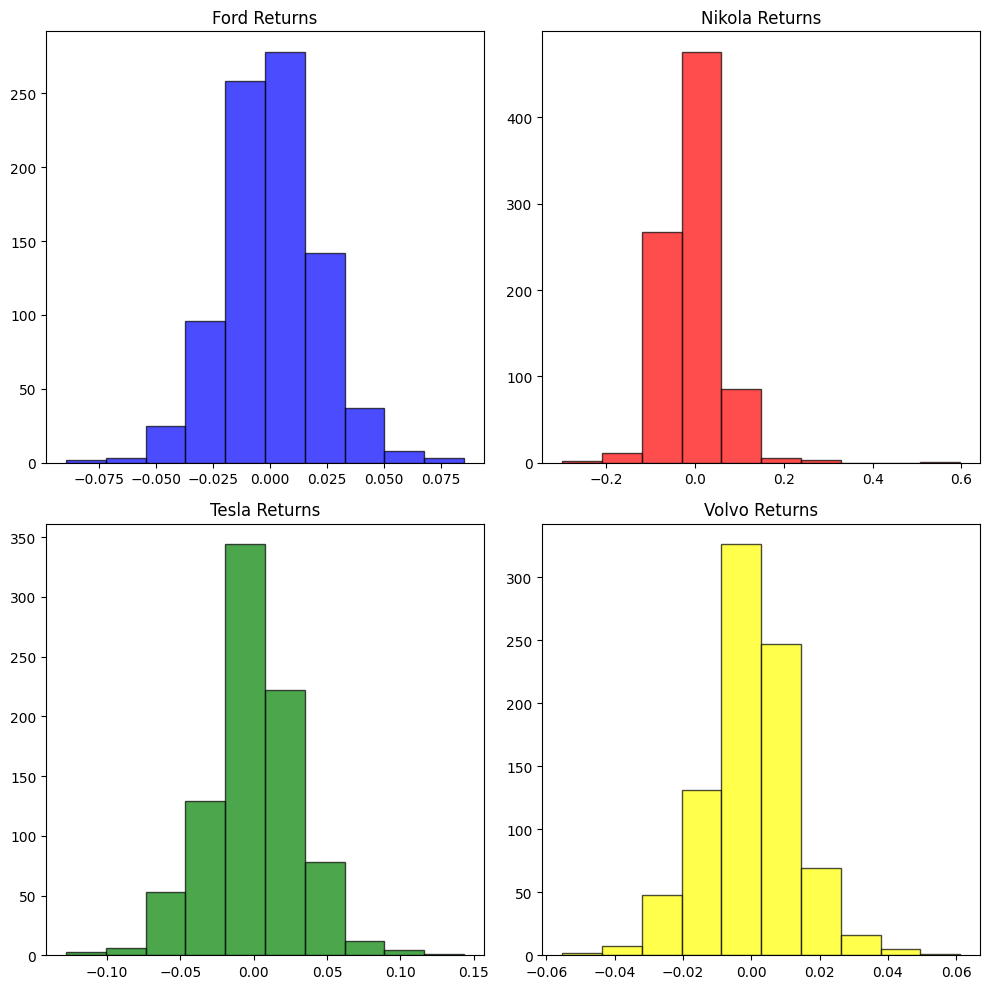

In [24]:
#Plotting histogram of the returns
bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
axs[0][0].hist(EV_data['Return', 'F'].dropna(), bins=bins, color='blue', edgecolor='black', alpha=0.7)
axs[0][0].set_title('Ford Returns')

axs[0][1].hist(EV_data['Return', 'NKLA'].dropna(), bins=bins, color='Red', edgecolor='black', alpha=0.7)
axs[0][1].set_title('Nikola Returns')

axs[1][0].hist(EV_data['Return', 'TSLA'].dropna(), bins=bins, color='Green', edgecolor='black', alpha=0.7)
axs[1][0].set_title('Tesla Returns')

axs[1][1].hist(EV_data['Return', 'VOLV-B.ST'].dropna(), bins=bins, color='Yellow', edgecolor='black', alpha=0.7)
axs[1][1].set_title('Volvo Returns')

plt.tight_layout()
plt.show()


### Ford Returns: 
The histogram is fairly symmetrical and centered around zero, which indicates stable returns with a balance of positive and negative days. The return values are tightly clustered, suggesting lower volatility.
### Nikola Returns: 
This histogram is tall and narrow with the peak around zero, but it also has a longer tail stretching towards the left. This indicates a large number of days with no significant change in return, but also a non-negligible frequency of days with negative returns, highlighting potential risk.
### Tesla Returns:
The distribution of Tesla's returns is broader than Ford's, implying greater volatility. The range of returns is more spread out, which could suggest higher potential for both gains and losses.
### Volvo Returns: 
The histogram for Volvo is relatively narrow, similar to Ford's, with a small skew to the right. This suggests mostly stable returns, with a slight tendency towards positive returns. The company's stock seems less volatile compared to Tesla and Nikola.

In [25]:
#Differencing
EV_data['Diff', 'F'] = EV_data['Close', 'F'].diff(1)
EV_data['Diff', 'TSLA'] = EV_data['Close', 'TSLA'].diff(1)
EV_data['Diff', 'NKLA'] = EV_data['Close', 'NKLA'].diff(1)
EV_data['Diff', 'VOLV-B.ST'] = EV_data['Close', 'VOLV-B.ST'].diff(1)


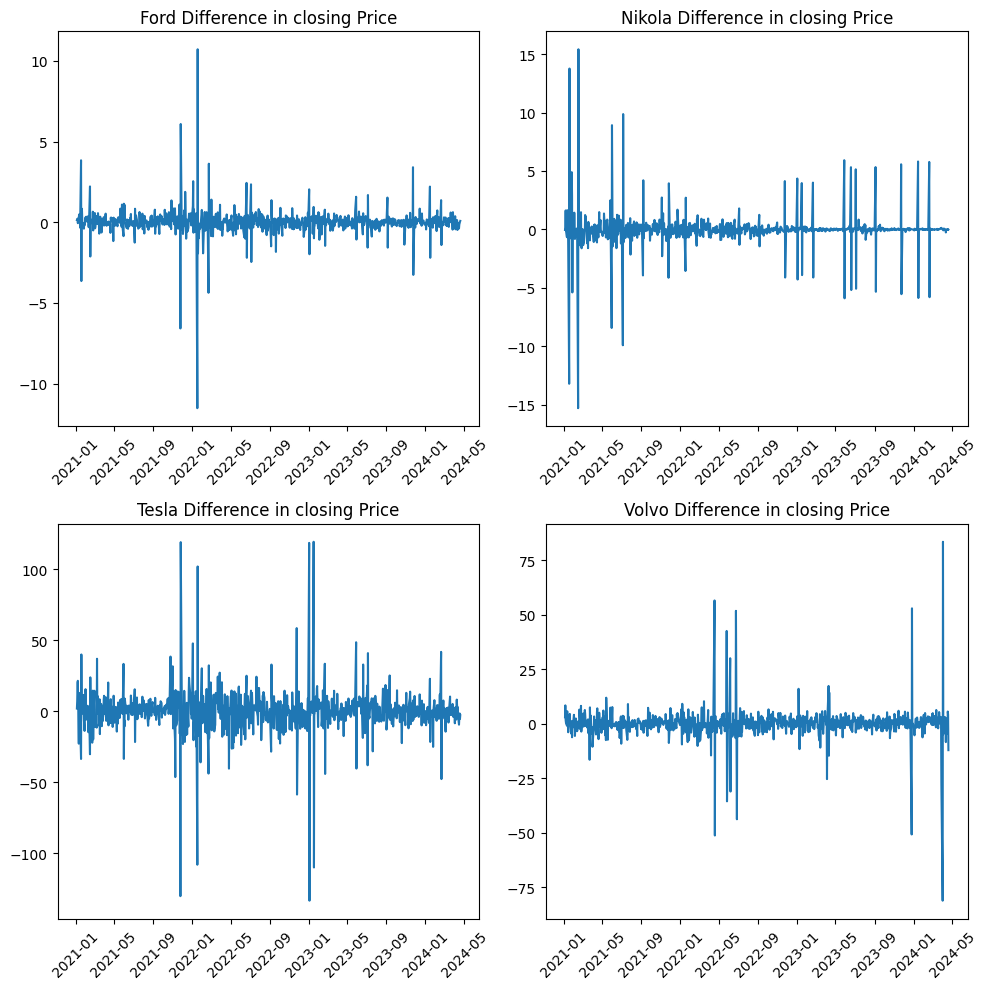

In [26]:
#Plotting Difference

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
axs[0][0].plot(EV_data['Diff', 'F'])
axs[0][0].set_title('Ford Difference in closing Price')
axs[0][1].plot(EV_data['Diff', 'NKLA'])
axs[0][1].set_title('Nikola Difference in closing Price')

axs[1][0].plot(EV_data['Diff', 'TSLA'])
axs[1][0].set_title('Tesla Difference in closing Price')

axs[1][1].plot(EV_data['Diff', 'VOLV-B.ST'])
axs[1][1].set_title('Volvo Difference in closing Price')
for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


### Resampling:
To change the frequency of the time series data (EX: stock data) like changing the daily data into monthly data

In [27]:
# Resamling daily data to weekly data
weekly_EV_data = EV_data.resample('W').mean()
weekly_EV_data

Price       Adj Close                                        Close              
Ticker              F       NKLA        TSLA   VOLV-B.ST         F       NKLA   
Date                                                                            
2021-01-10   7.483989  16.776000  261.128000  173.996229   8.81400  16.776000  \
2021-01-17   8.297429  19.380000  279.079999  175.972122   9.77200  19.380000   
2021-01-24   9.898838  17.274993  274.105149  177.721280  11.51916  17.274993   
2021-01-31   9.258612  24.246000  283.800671  173.249371  10.90400  24.246000   
2021-02-07   9.470889  23.792000  284.633997  175.064545  11.15400  23.792000   
...               ...        ...         ...         ...       ...        ...   
2024-03-24  12.642000   0.632800  172.886005  298.998627  12.64200   0.632800   
2024-03-31  12.920000   0.876750  176.480000  302.375183  12.92000   0.876750   
2024-04-07  13.342000   0.973200  169.248001  270.903828  13.34200   0.973200   
2024-04-14  13.132000   0.881200  173.454001  288.720001  13.13200   0.881200   
2024-04-21  12.112000   0.653200  154.203998  286.020001  12.11200   0.653200   

Price                                    High             ...        Volume   
Ticker            TSLA   VOLV-B.ST          F       NKLA  ...          TSLA   
Date                                                      ...                 
2021-01-10  261.128000  205.803037   8.944000  17.208000  ...  1.512827e+08  \
2021-01-17  279.079999  213.280002   9.862000  20.457800  ...  1.253572e+08   
2021-01-24  274.105149  215.399997  11.760996  17.799047  ...  7.537781e+07   
2021-01-31  283.800671  209.980002  11.222000  26.430000  ...  9.180468e+07   
2021-02-07  284.633997  212.180002  11.504000  24.699000  ...  6.147624e+07   
...                ...         ...        ...        ...  ...           ...   
2024-03-24  172.886005  309.210004  12.696000   0.654600  ...  8.359304e+07   
2024-03-31  176.480000  310.225006  13.097500   0.906250  ...  8.671840e+07   
2024-04-07  169.248001  274.023035  13.556000   1.036000  ...  1.091151e+08   
2024-04-14  173.454001  288.720001  13.296000   0.967600  ...  9.024220e+07   
2024-04-21  154.203998  286.020001  12.344000   0.695800  ...  9.235778e+07   

Price                       Return                                  Diff   
Ticker         VOLV-B.ST         F      TSLA      NKLA VOLV-B.ST       F   
Date                                                                       
2021-01-10  4.502835e+06 -0.000709  0.020860  0.009407  0.010595  0.1200  \
2021-01-17  3.454653e+06  0.020551 -0.009856  0.020456 -0.000382  0.1660   
2021-01-24  2.748941e+06  0.013570  0.000119  0.002211  0.002088  0.3380   
2021-01-31  4.366291e+06 -0.013125 -0.002272  0.030109 -0.006251 -0.1980   
2021-02-07  6.949909e+06 -0.001960  0.008371 -0.008738 -0.009812  0.1960   
...                  ...       ...       ...       ...       ...     ...   
2024-03-24  3.406680e+06  0.014859  0.007234  0.002053  0.002482  0.1700   
2024-03-31  4.037979e+06  0.004174 -0.000057  0.101684 -0.006383  0.0925   
2024-04-07  3.571943e+06 -0.002516  0.002799 -0.011911  0.002498  0.0000   
2024-04-14  3.219346e+06 -0.006945  0.008291 -0.067487 -0.006626 -0.1340   
2024-04-21  5.533990e+06 -0.008812 -0.016921 -0.018730  0.000849 -0.0940   

Price                                    
Ticker           TSLA    NKLA VOLV-B.ST  
Date                                     
2021-01-10  12.520832  0.4175  3.375000  
2021-01-17  -3.590668  0.3980 -0.100000  
2021-01-24   1.365332  0.0760  1.359998  
2021-01-31  -3.540662  0.5940 -2.119998  
2021-02-07   3.913330  0.1020  0.560001  
...               ...     ...       ...  
2024-03-24   1.451999  0.0036  1.420001  
2024-03-31   1.239998  0.0945 -6.212502  
2024-04-07  -2.178000 -0.0040  0.100000  
2024-04-14   1.230002 -0.0640 -1.240002  
2024-04-21  -4.800000 -0.0112 -0.839996  

[172 rows x 32 columns]

In [28]:
monthly_EV_data = EV_data.resample('M').mean()
monthly_EV_data

Price       Adj Close                                         Close   
Ticker              F       NKLA        TSLA   VOLV-B.ST          F   
Date                                                                  
2021-01-31   8.734717  19.419248  274.528455  175.234751  10.252290  \
2021-02-28   9.907328  21.213248  263.601121  176.091765  11.633290   
2021-03-31  10.617103  15.575870  218.934202  189.318974  12.503913   
2021-04-30  10.361880  11.847857  236.539365  180.712001  12.203333   
2021-05-31  10.592756  12.013093  207.301705  185.655639  12.442181   
2021-06-30  12.876638  17.288636  208.973183  191.250996  15.165000   
2021-07-31  12.022519  14.087044  220.708747  186.869337  14.127536   
2021-08-31  11.335904  10.048636  235.081062  179.196708  13.350455   
2021-09-30  11.349026  10.405680  250.877991  172.875111  13.334355   
2021-10-31  13.163514  10.904286  292.783017  178.417502  15.502857   
2021-11-30  16.412303  12.350680  367.558442  185.155904  19.261173   
2021-12-31  17.151732   9.885000  339.629999  182.524224  20.098636   
2022-01-31  18.888621   8.922141  332.195509  193.913325  22.094562   
2022-02-28  15.390669   7.796748  290.395953  184.834934  17.915290   
2022-03-31  14.319462   8.562609  304.793186  158.792090  16.693913   
2022-04-30  13.247296   8.320500  332.462503  151.333279  15.419500   
2022-05-31  11.588625   6.348407  254.606323  153.944557  13.400264   
2022-06-30  10.738105   5.889316  234.372383  160.942572  12.415264   
2022-07-31  10.647891   5.630236  250.930591  158.481113  12.309800   
2022-08-31  13.597127   6.580435  294.869857  166.682222  15.637826   
2022-09-30  12.095475   4.745680  286.594505  154.110535  13.855264   
2022-10-31  10.652301   3.198095  223.810477  159.312444  12.214762   
2022-11-30  12.131652   2.941135  193.537686  177.419250  13.817082   
2022-12-31  11.018777   2.390000  152.970476  179.332981  12.504286   
2023-01-31  11.282321   2.839542  143.964462  187.693501  12.787800   
2023-02-28  11.814419   2.678248  201.868955  194.095551  12.925790   
2023-03-31  11.300086   1.698696  188.522609  193.408914  12.063044   
2023-04-30  11.549394   0.989421  176.955262  200.163991  12.298421   
2023-05-31  11.208057   1.033433  178.662133  197.715027  11.852426   
2023-06-30  13.132001   1.248180  245.888595  206.379016  13.882536   
2023-07-31  13.626637   2.230950  271.988528  216.632539  14.363610   
2023-08-31  11.782528   1.902609  242.333043  217.384595  12.289130   
2023-09-30  11.874553   1.508760  256.238528  217.834351  12.430276   
2023-10-31  11.107948   1.202727  236.907727  215.798259  11.578636   
2023-11-30  10.051160   1.271135  229.968141  222.468196  10.374355   
2023-12-31  11.284512   0.866700  247.137998  244.740388  11.589000   
2024-01-31  11.287792   0.985271  217.290414  241.104458  11.644355   
2024-02-29  12.167327   0.998570  195.119481  260.052060  12.393134   
2024-03-31  12.518000   0.702100  176.163000  293.593596  12.518000   
2024-04-30  12.862000   0.835867  165.635333  281.881277  12.862000   

Price                                               High             ...   
Ticker           NKLA        TSLA   VOLV-B.ST          F       NKLA  ...   
Date                                                                 ...   
2021-01-31  19.419248  274.528455  211.115759  10.447249  20.473712  ...  \
2021-02-28  21.213248  263.601121  213.425001  11.857749  21.980512  ...   
2021-03-31  15.575870  218.934202  229.456519  12.745217  16.204696  ...   
2021-04-30  11.847857  236.539365  209.345960  12.379524  12.480000  ...   
2021-05-31  12.013093  207.301705  215.093579  12.628809  12.461202  ...   
2021-06-30  17.288636  208.973183  221.200689  15.420455  17.970591  ...   
2021-07-31  14.087044  220.708747  207.662272  14.336590  14.666738  ...   
2021-08-31  10.048636  235.081062  199.135910  13.532727  10.457682  ...   
2021-09-30  10.405680  250.877991  192.110909  13.504772  10.755193  ...   
2021-10-31  10.904286  292.783017 

(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601., 19723., 19844.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05')])

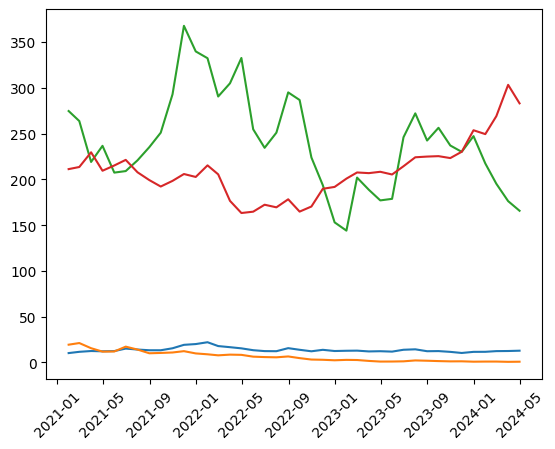

In [29]:
plt.plot(monthly_EV_data['Close'])
plt.xticks(rotation=45)